## **EDA**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.diagnostic as diag

In [3]:
gold = pd.read_csv("data/Gold Price.csv")
bitcoin = pd.read_csv("data/bitcoin_price_dataset_2015_2023.csv")

In [4]:
gold

Date  Price   Open   High    Low  Volume  Chg%
0     2024-11-06  77030  78300  78570  77030       0 -1.86
1     2024-11-05  78490  78224  78670  78160       0  0.11
2     2024-11-04  78401  78498  78642  78237       0 -0.54
3     2024-11-01  78829  78650  78887  78550       0  0.64
4     2024-10-31  78326  79264  79999  77803      90 -1.17
...          ...    ...    ...    ...    ...     ...   ...
2801  2014-01-06  29119  29300  29395  29051   24380 -0.55
2802  2014-01-04  29279  29279  29279  29279       0 -1.51
2803  2014-01-03  29727  30031  30125  29539    3050 -0.83
2804  2014-01-02  29975  29678  30050  29678    3140  1.47
2805  2014-01-01  29542  29435  29598  29340    2930  0.25

[2806 rows x 7 columns]

In [5]:
bitcoin

Date  Open Price (USD)  High Price (USD)  Low Price (USD)  \
0     2023-09-06      25772.601563      25845.994141     25708.595703   
1     2023-09-05      25814.957031      25858.375000     25589.988281   
2     2023-09-04      25968.169922      26081.525391     25657.025391   
3     2023-09-03      25869.472656      26087.148438     25817.031250   
4     2023-09-02      25800.910156      25970.285156     25753.093750   
...          ...               ...               ...              ...   
3166  2015-01-05        265.084015        278.341003       265.084015   
3167  2015-01-04        281.145996        287.230011       257.612000   
3168  2015-01-03        314.846008        315.149994       281.082001   
3169  2015-01-02        314.079010        315.838989       313.565002   
3170  2015-01-01        320.434998        320.434998       314.002991   

      Closing Price (USD)  Adjusted Closing Price (USD)  Trading Volume  
0            25721.945313                  25721.945313     10252755968  
1            25779.982422                  25779.982422     11094740040  
2            25812.416016                  25812.416016     10680635106  
3            25969.566406                  25969.566406      8962524523  
4            25868.798828                  25868.798828     10100387473  
...                   ...                           ...             ...  
3166           274.473999                    274.473999        43962800  
3167           264.195007                    264.195007        55629100  
3168           281.082001                    281.082001        33054400  
3169           315.032013                    315.032013         7860650  
3170           314.248993                    314.248993         8036550  

[3171 rows x 7 columns]

In [6]:
df = pd.merge(gold, bitcoin, on="Date", how="inner")
df

Date  Price   Open   High    Low  Volume  Chg%  Open Price (USD)  \
0     2023-09-06  59111  59208  59310  59021    6940 -0.32      25772.601563   
1     2023-09-05  59301  59550  59550  59150      30 -0.14      25814.957031   
2     2023-09-04  59385  59125  59540  59101      90  0.47      25968.169922   
3     2023-09-01  59106  59082  59507  59051     400 -0.01      25934.021484   
4     2023-08-31  59113  59138  59379  59001     200 -0.01      27301.929688   
...          ...    ...    ...    ...    ...     ...   ...               ...   
2233  2015-01-07  27159  27328  27350  27110   19660 -0.83        286.076996   
2234  2015-01-06  27385  27095  27442  27094   26640  2.00        274.610992   
2235  2015-01-05  26847  26800  26911  26650     570  0.55        265.084015   
2236  2015-01-02  26700  26585  26740  26285    1990  0.43        314.079010   
2237  2015-01-01  26586  26610  26647  26539    1820 -0.03        320.434998   

      High Price (USD)  Low Price (USD)  Closing Price (USD)  \
0         25845.994141     25708.595703         25721.945313   
1         25858.375000     25589.988281         25779.982422   
2         26081.525391     25657.025391         25812.416016   
3         26125.869141     25362.609375         25800.724609   
4         27456.078125     25752.929688         25931.472656   
...                ...              ...                  ...   
2233        298.753998       283.079010           294.337006   
2234        287.553009       272.696014           286.188995   
2235        278.341003       265.084015           274.473999   
2236        315.838989       313.565002           315.032013   
2237        320.434998       314.002991           314.248993   

      Adjusted Closing Price (USD)  Trading Volume  
0                     25721.945313     10252755968  
1                     25779.982422     11094740040  
2                     25812.416016     10680635106  
3                     25800.724609     17202862221  
4                     25931.472656     20181001451  
...                            ...             ...  
2233                    294.337006        24866800  
2234                    286.188995        23245700  
2235                    274.473999        43962800  
2236                    315.032013         7860650  
2237                    314.248993         8036550  

[2238 rows x 13 columns]

In [7]:
df.drop(columns=['Adjusted Closing Price (USD)'], inplace=True)
df.columns = ['Date', 'FCP_Gold', 'OP_Gold', 'HP_Gold', 'LP_Gold','TV_Gold',
              'CHG%_Gold', 'OP_BTC', 'HP_BTC', 'LP_BTC', 'FCP_BTC','TV_BTC']

In [8]:
df[['OP_BTC', 'HP_BTC', 'LP_BTC', 'FCP_BTC']] = df[['OP_BTC', 'HP_BTC', 'LP_BTC', 'FCP_BTC']].round(0).astype(int)
df['CHG%_BTC'] = ((df['FCP_BTC'] - df['FCP_BTC'].shift(-1)) / df['FCP_BTC'].shift(-1) * 100).round(2)
df.insert(4, 'FCP_Gold', df.pop('FCP_Gold'))
df.loc[2237,'CHG%_BTC'] = -1.90
df

Date  OP_Gold  HP_Gold  LP_Gold  FCP_Gold  TV_Gold  CHG%_Gold  \
0     2023-09-06    59208    59310    59021     59111     6940      -0.32   
1     2023-09-05    59550    59550    59150     59301       30      -0.14   
2     2023-09-04    59125    59540    59101     59385       90       0.47   
3     2023-09-01    59082    59507    59051     59106      400      -0.01   
4     2023-08-31    59138    59379    59001     59113      200      -0.01   
...          ...      ...      ...      ...       ...      ...        ...   
2233  2015-01-07    27328    27350    27110     27159    19660      -0.83   
2234  2015-01-06    27095    27442    27094     27385    26640       2.00   
2235  2015-01-05    26800    26911    26650     26847      570       0.55   
2236  2015-01-02    26585    26740    26285     26700     1990       0.43   
2237  2015-01-01    26610    26647    26539     26586     1820      -0.03   

      OP_BTC  HP_BTC  LP_BTC  FCP_BTC       TV_BTC  CHG%_BTC  
0      25773   25846   25709    25722  10252755968     -0.22  
1      25815   25858   25590    25780  11094740040     -0.12  
2      25968   26082   25657    25812  10680635106      0.04  
3      25934   26126   25363    25801  17202862221     -0.50  
4      27302   27456   25753    25931  20181001451     -5.00  
...      ...     ...     ...      ...          ...       ...  
2233     286     299     283      294     24866800      2.80  
2234     275     288     273      286     23245700      4.38  
2235     265     278     265      274     43962800    -13.02  
2236     314     316     314      315      7860650      0.32  
2237     320     320     314      314      8036550     -1.90  

[2238 rows x 13 columns]

OP_BTC = open price Bitcoin                
OP_Gold = open price Gold      

HP_BTC = highest price Bitcoin                
HP_Gold = highest price Gold         

LP_BTC = lowest price Bitcoin                
LP_Gold = lowest price Gold                       
                
FCP_BTC = final closing price Bitcoin                
FCP_Gold = final closing price Gold                
                
TV_BTC = trading volume Bitcoin                
TV_Gold = trading volume Gold                
                
CHG%_BTC = % price change of Bitcoin                
CHG%_Gold = % price change of gold                
                
Gold = price per 10gr                
                
Добавили переменную CHG%_BTC для сравнения с золотом (как %-ое изменение FCP за день)                
В BTC убрали дробные части                
Скорректировали данные по общим датам, где-то пришлось урезать количество наблюдений                
Все параметры в $ (USD)

In [9]:
print(f'Количество пропусков в df: {df.isnull().sum().sum()}')
print(f'Количество дублей в df: {df.duplicated().sum()}')

Количество пропусков в df: 0
Количество дублей в df: 0


Так как пропусков данных в основной рабочей таблицы нет, можно не заполнять их медианными/средними и иными значениями.

In [10]:
df.describe()

OP_Gold       HP_Gold       LP_Gold      FCP_Gold        TV_Gold  \
count   2238.000000   2238.000000   2238.000000   2238.000000    2238.000000   
mean   38653.550492  38857.650581  38442.591600  38650.211796   12930.209115   
std    10817.185529  10878.552995  10750.090447  10815.822719   11291.755937   
min    24583.000000  24635.000000  24470.000000  24545.000000       0.000000   
25%    29319.500000  29456.750000  29192.500000  29340.000000    6315.000000   
50%    32635.500000  32800.000000  32480.500000  32591.500000   10610.000000   
75%    48752.500000  49032.000000  48500.250000  48804.250000   16785.000000   
max    61899.000000  61899.000000  61150.000000  61683.000000  106920.000000   

         CHG%_Gold        OP_BTC        HP_BTC        LP_BTC       FCP_BTC  \
count  2238.000000   2238.000000   2238.000000   2238.000000   2238.000000   
mean      0.039035  14331.951743  14702.324397  13921.485702  14335.179178   
std       0.806080  16089.757456  16522.476688  15591.650944  16076.162320   
min      -5.610000    177.000000    212.000000    172.000000    178.000000   
25%      -0.380000   1049.250000   1079.250000   1031.000000   1055.750000   
50%       0.040000   8223.500000   8393.500000   8003.000000   8230.000000   
75%       0.460000  22211.250000  22667.750000  21435.500000  22220.750000   
max       5.300000  67550.000000  68790.000000  66382.000000  67567.000000   

             TV_BTC     CHG%_BTC  
count  2.238000e+03  2238.000000  
mean   1.803433e+10     0.294584  
std    2.055511e+10     4.420609  
min    7.860650e+06   -37.160000  
25%    2.645232e+08    -1.477500  
50%    1.363268e+10     0.195000  
75%    2.988738e+10     2.127500  
max    3.509679e+11    25.240000

По этим статистическим данным можно заметить, что, например, в среднем биткоин рос в финальной цене закрытия на 0,29%, в то время как золото - только на 0.04%. Это доказывает более высокую волатильность биткоина как актива. Это же можно отметить и по std CHG%. У биткоина стандартное отклонение около 4.4 изменении цен каждый день, а у золота - менее единицы, т.е. около 0,8.

## **Визуализация**

In [11]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

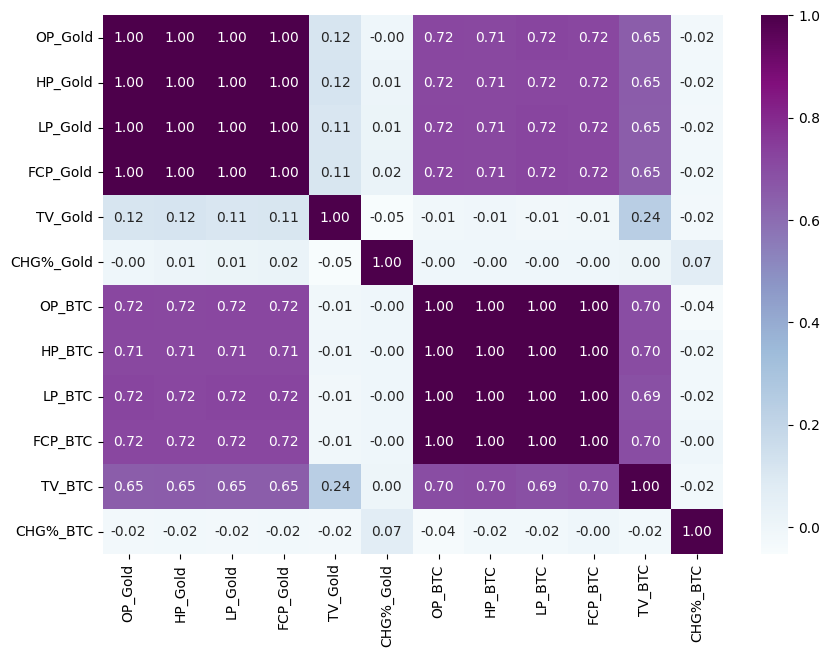

In [12]:
df_corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 7))
ax = sns.heatmap(df_corr, cmap="BuPu", annot=True, fmt="0.2f")
plt.show()

Интересно, что между основными показателями биткоина и золота есть умеренная положительная корреляция от ${0,65}$ до ${0,72}$. Можно исследовать это в следующем этапе проекта.

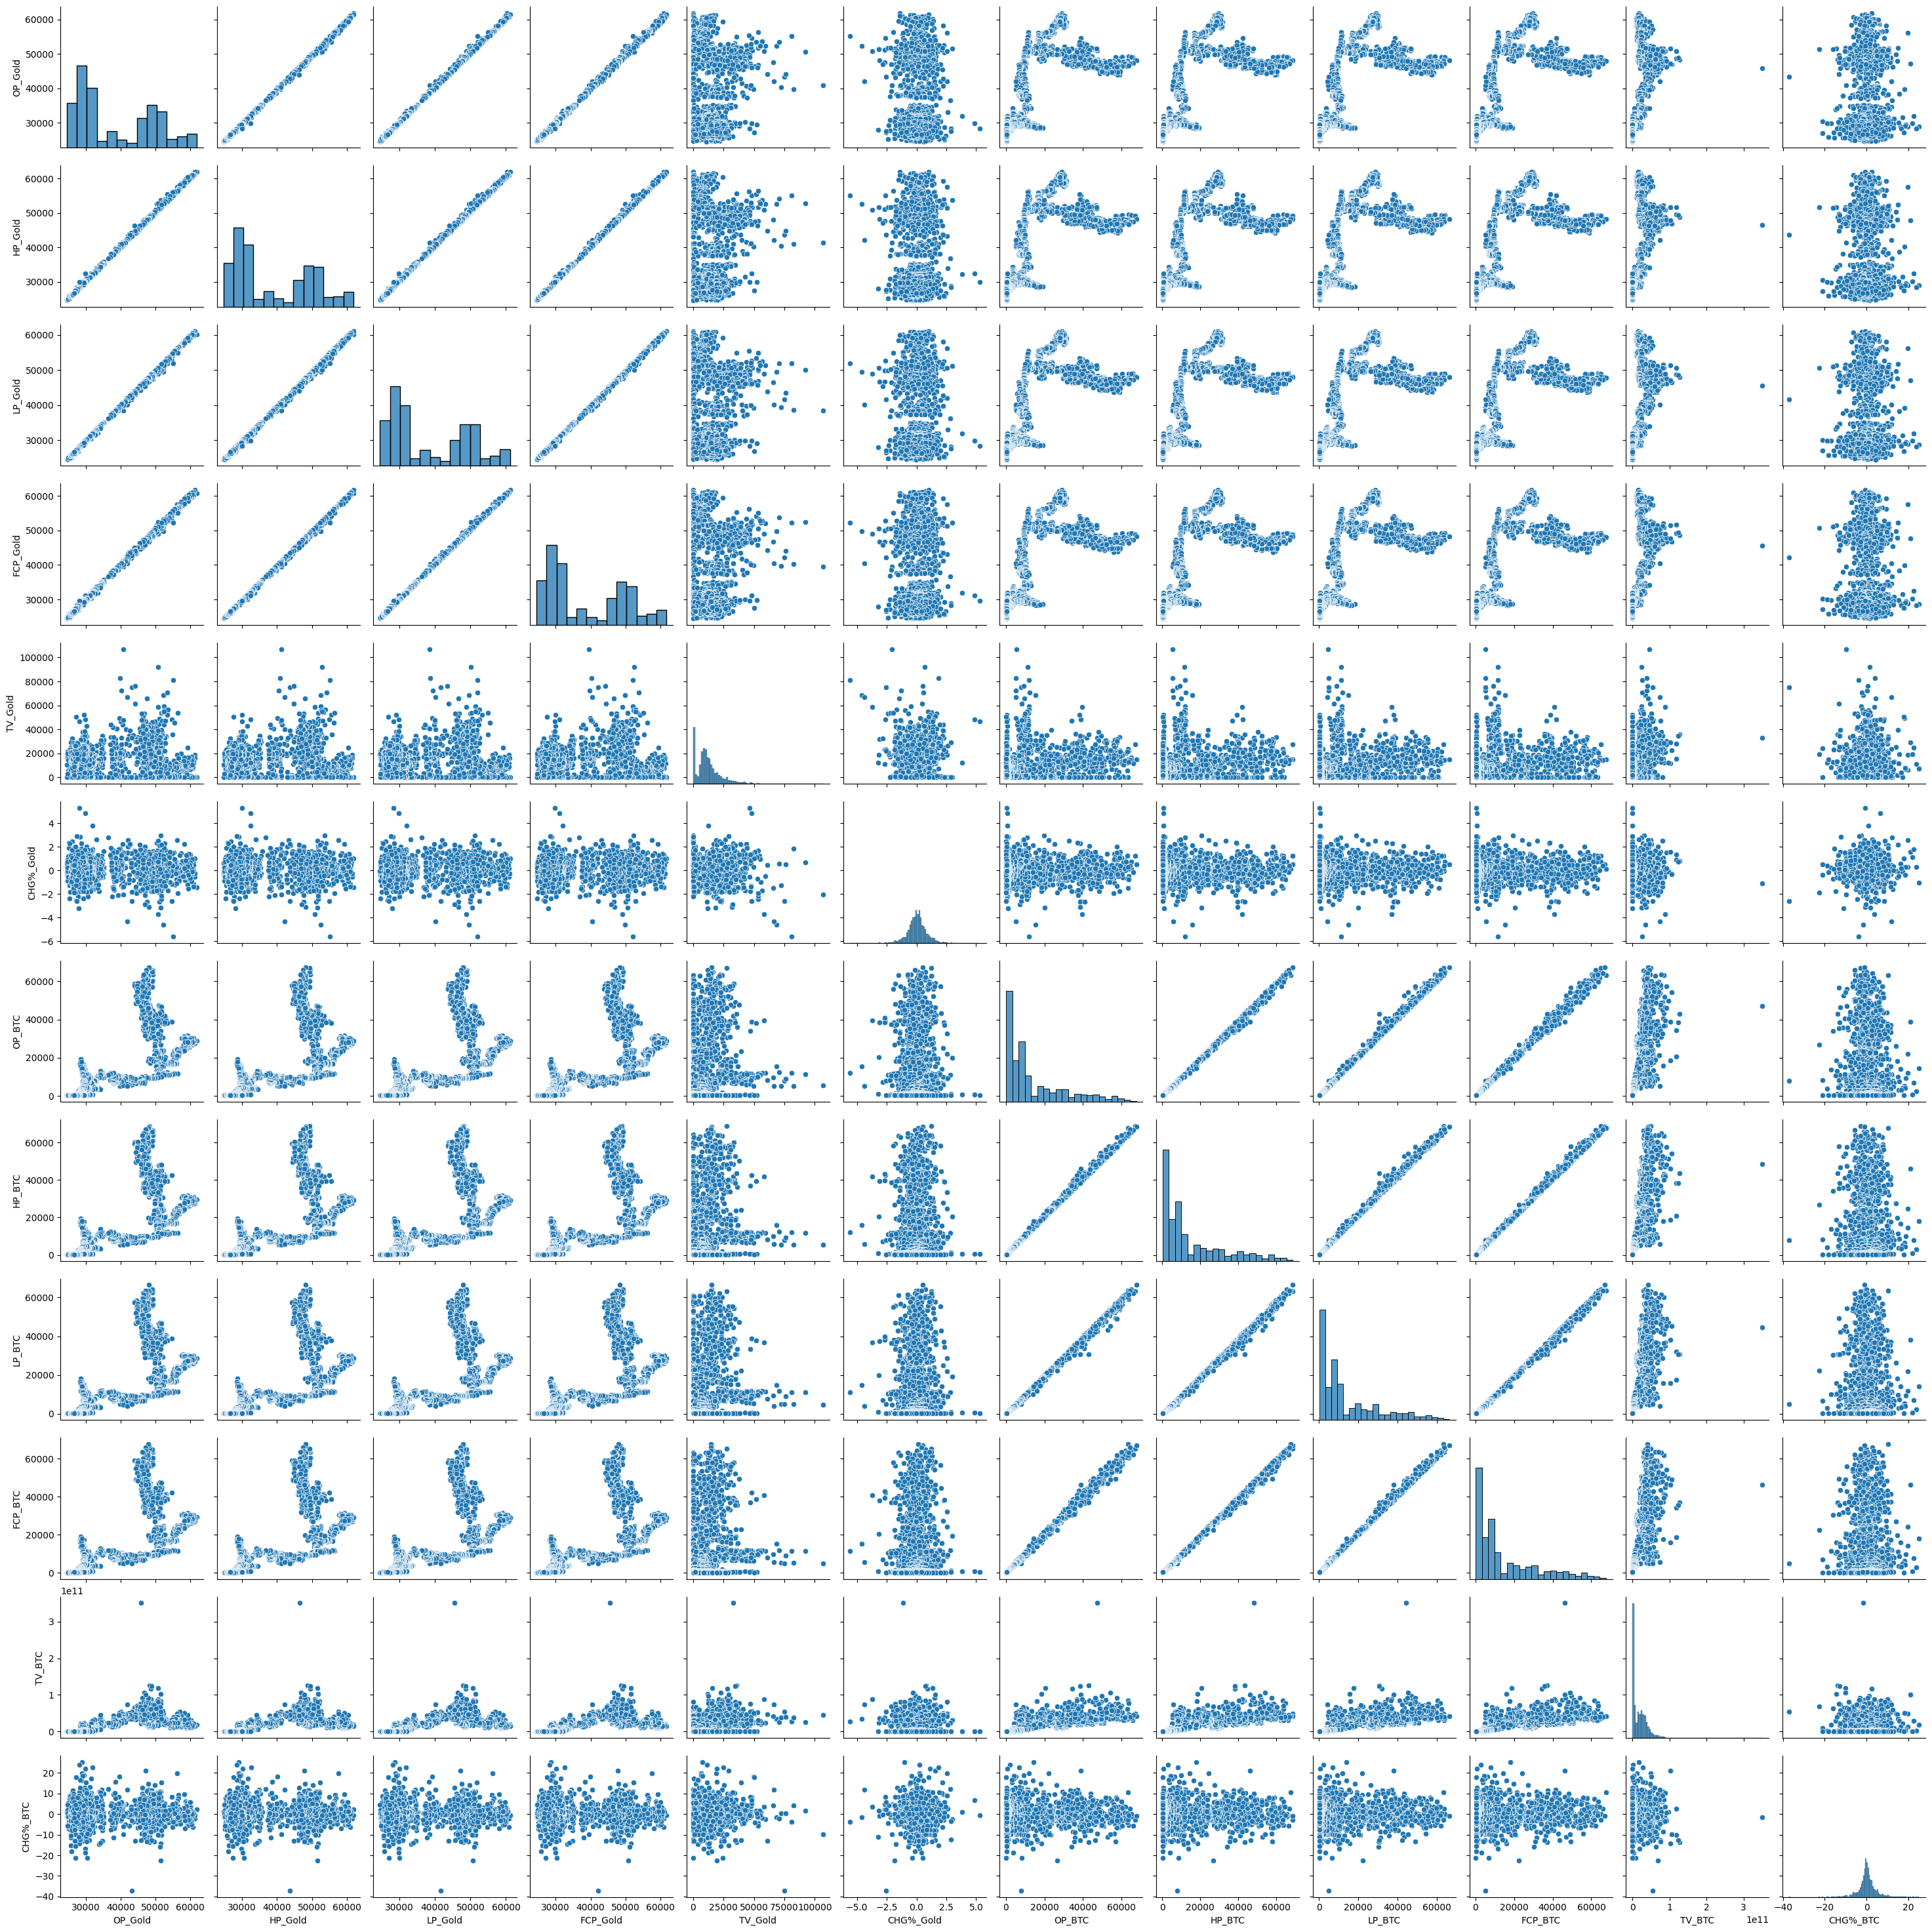

In [13]:
plt.show(sns.pairplot(df))

In [14]:
trace_0 = go.Scatter(x=df['Date'], y=df['HP_Gold'], name='Gold')
trace_1 = go.Scatter(x=df['Date'], y=df['HP_BTC'], name='Bitcoin')
layout = go.Layout(title='Highest prices', xaxis_title='Date', yaxis_title='Highest price')
fig_1 = go.Figure(data=[trace_0,trace_1], layout=layout)

fig_1.show()

In [15]:
trace_2 = go.Scatter(x=df['Date'], y=df['LP_Gold'], name='Gold')
trace_3 = go.Scatter(x=df['Date'], y=df['LP_BTC'], name='Bitcoin')
layout = go.Layout(title='Lowest prices', xaxis_title='Date', yaxis_title='Lowest price')
fig_2 = go.Figure(data=[trace_2,trace_3], layout=layout)

fig_2.show()

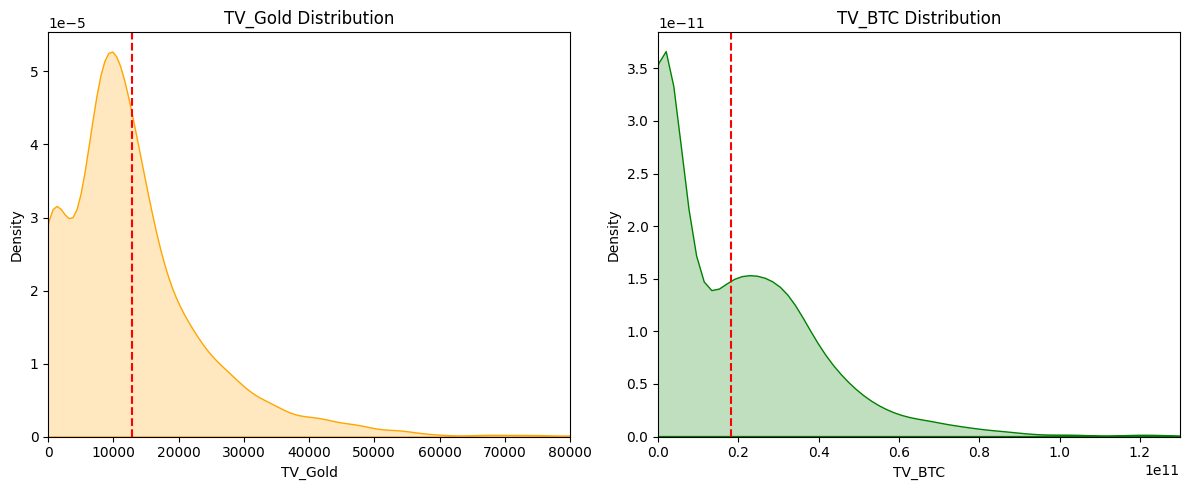

In [16]:
fig,axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(data=df, x='TV_Gold', color='orange', fill=True, ax=axes[0])
axes[0].axvline(df.TV_Gold.mean(), linestyle='--', color='r')
axes[0].set_xlim(0, 80000)
axes[0].set_title("TV_Gold Distribution")

sns.kdeplot(data=df, x='TV_BTC', color='green', fill=True, ax=axes[1])
axes[1].axvline(df.TV_BTC.mean(), linestyle='--', color='r')
axes[1].set_xlim(0, 1.3*(10**11))
axes[1].set_title("TV_BTC Distribution")

plt.tight_layout()
plt.show()

## **Гипотезы**
1) Золото как актив более стабильно и во время экономических и политических кризисов растет в цене меньше, чем биткоин;

2) Биткоин и золото взаимосвязаны как активы - чем больше растет в цене золото, тем сильнее дорожает биткоин;

3) На торгах биткоин не стоит оценивать по начальной цене и цене закрытия, в то время как золото - стоит *(здесь можем проверить дисперсию, интерквартильные размахи)*

## **Проверка независимости доходностей**

Для проверки независимости будем использовать тест Ljung-Box

### Золото

$H_0$: CHG%_Gold распределены независимо

$H_1$: CHG%_Gold не распределены независимо, они демонстрируют автокорреляцию

In [17]:
# проверим автокорелляцию у доходностей золота
alpha = 0.05 # уровень значимости

chg_gold = df['CHG%_Gold']

lb_test_gold = diag.acorr_ljungbox(chg_gold, boxpierce=False, auto_lag=True) # проверка на автокорреляцию
lb_test_gold['lb_pvalue'] > alpha

1    True
Name: lb_pvalue, dtype: bool

$\text{P-value}> 0.05$ для всех лагов (тут auto_lag предлагает посмотреть для 1), значит нет статистически значимой автокорреляции

$H_0$ верна, процентные изменения цены (доходности) золота независимы между собой

Попробуем также посмотреть это на графике независимости лагов

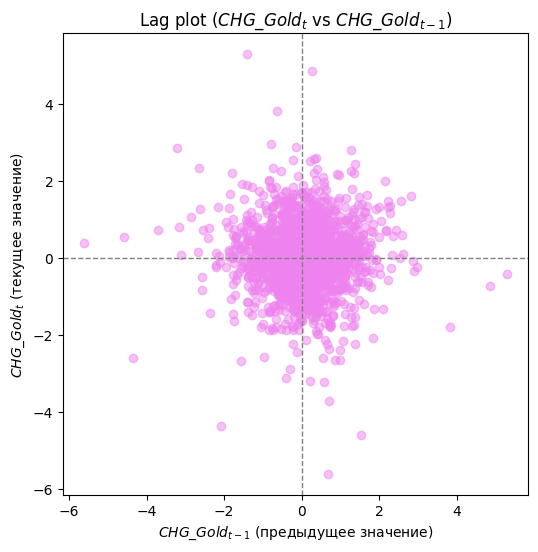

In [18]:
df_chg_t_1_gold = pd.DataFrame({'CHG_Gold_t': chg_gold, 'CHG_Gold_t-1': np.roll(chg_gold, 1)})

plt.figure(figsize=(6, 6))
plt.scatter(df_chg_t_1_gold['CHG_Gold_t-1'][1:], df_chg_t_1_gold['CHG_Gold_t'][1:], alpha=0.5, color='violet')
plt.xlabel('$CHG\_Gold_{t-1}$ (предыдущее значение)')
plt.ylabel('$CHG\_Gold_t$ (текущее значение)')
plt.title('Lag plot ($CHG\_Gold_t$ vs $CHG\_Gold_{t-1}$)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

Точки не образуют четкой линии, автокорреляция отсутствует

### Биткоин

$H_0$: CHG%_BTC распределены независимо

$H_1$: CHG%_BTC не распределены независимо, они демонстрируют автокорреляцию

In [19]:
# проверим автокорелляцию у доходностей биткоина
chg_btc = df['CHG%_BTC']

lb_test_btc = diag.acorr_ljungbox(chg_btc, boxpierce=False, auto_lag=True) # проверка на автокорреляцию
lb_test_btc['lb_pvalue'] > alpha

1    True
2    True
Name: lb_pvalue, dtype: bool

$\text{P-value}> 0.05$ для всех лагов (здесь уже auto_lag предлагает посмотреть для 2), значит нет статистически значимой автокорреляции

$H_0$ верна, процентные изменения цены (доходности) биткоина независимы между собой

Попробуем также посмотреть это на графике независимости лагов

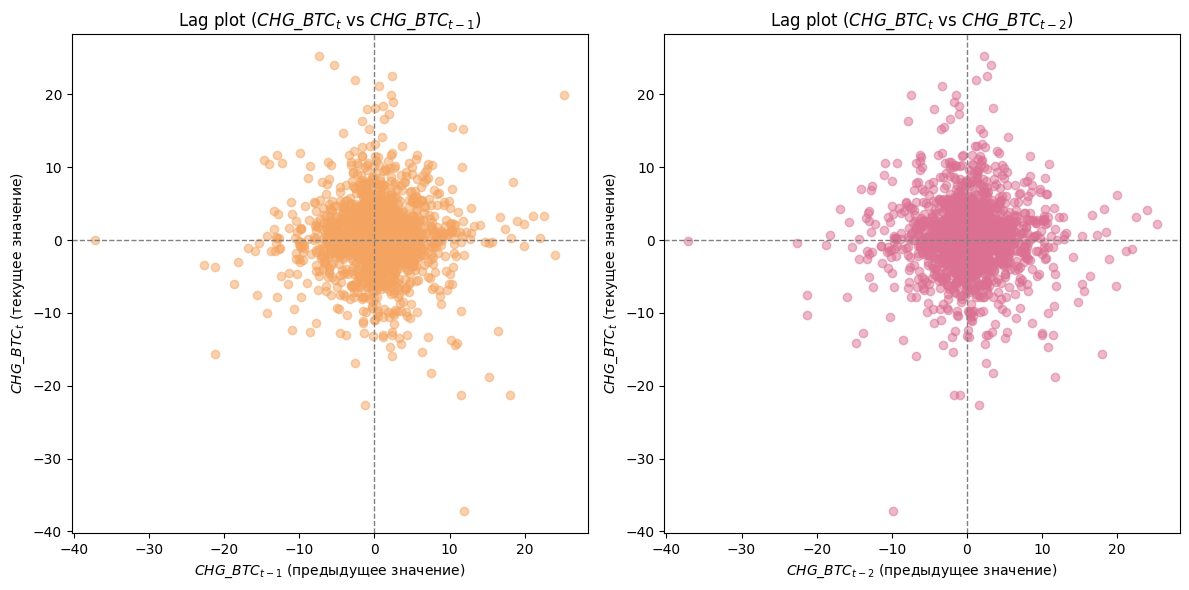

In [20]:
df_chg_t_1_btc = pd.DataFrame({'CHG_BTC_t': chg_btc, 'CHG_BTC_t-1': np.roll(chg_btc, 1)})
df_chg_t_2_btc = pd.DataFrame({'CHG_BTC_t': chg_btc, 'CHG_BTC_t-2': np.roll(chg_btc, 2)})

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(df_chg_t_1_btc['CHG_BTC_t-1'][1:], df_chg_t_1_btc['CHG_BTC_t'][1:], alpha=0.5, color='sandybrown')
axes[0].set_xlabel('$CHG\_BTC_{t-1}$ (предыдущее значение)')
axes[0].set_ylabel('$CHG\_BTC_t$ (текущее значение)')
axes[0].set_title('Lag plot ($CHG\_BTC_t$ vs $CHG\_BTC_{t-1}$)')
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0].axvline(0, color='gray', linestyle='--', linewidth=1)

axes[1].scatter(df_chg_t_2_btc['CHG_BTC_t-2'][2:], df_chg_t_2_btc['CHG_BTC_t'][2:], alpha=0.5, color='palevioletred')
axes[1].set_xlabel('$CHG\_BTC_{t-2}$ (предыдущее значение)')
axes[1].set_ylabel('$CHG\_BTC_t$ (текущее значение)')
axes[1].set_title('Lag plot ($CHG\_BTC_t$ vs $CHG\_BTC_{t-2}$)')
axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

Точки не образуют четкой линии, автокорреляция отсутствует

Далее будем считать, что доходности золота iid и доходности биткоина также iid, что в дальнейшем сильно упростит исследование данных

## Бутстрэп

Проверим, отличаются ли средние доходности золота и биткоина статистически значимо

In [101]:
def get_bootstrap_sample(x, B_sample=1):
    N = x.size
    sample = np.random.choice(x, size=(N, B_sample), replace=True)

    if B_sample == 1:
        sample = sample.T[0]
    return sample

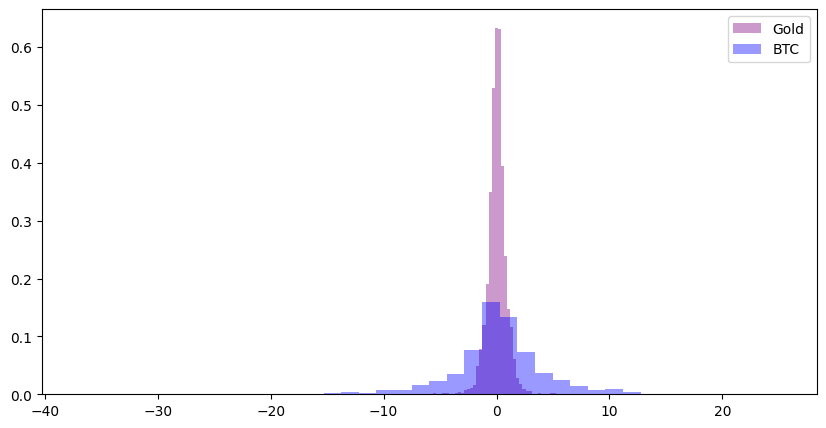

In [107]:
x = df['CHG%_Gold']
y = df['CHG%_BTC']

plt.figure(figsize=(10,5))
plt.hist(x, bins=40, density=True, alpha=0.4, color='purple', label='Gold')
plt.hist(y, bins=40, density=True, alpha=0.4, color='b', label='BTC')
plt.legend()

Оба распределения симметричные, значит можно использовать Эфронов интервал

In [103]:
x_boot = get_bootstrap_sample(x, B_sample=10**4)
x_boot = np.mean(x_boot, axis=0)

y_boot = get_bootstrap_sample(y, B_sample=10**4)
y_boot = np.mean(y_boot, axis=0)

In [104]:
def stat_intervals(boot, alpha=0.05):
    left = np.quantile(boot, alpha/2)
    right = np.quantile(boot, 1-alpha/2)
    return left, right

stat_intervals(x_boot - y_boot)

(-0.44378083109919647, -0.06915136282395004)

Ноль не попадает в доверительный интервал, то есть на уровне значимости $5\%$ разница есть

Весь интервал отрицательный, значит биткоин в среднем приносит больше доходности, чем золото